In [2]:
import matplotlib.pyplot as plt
from datasets import FlickrDataset
import numpy as np
import torch
import torchvision.transforms.functional as TF
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
from models import ResNet34
from models import SiameseNetwork
import random
from distances import *
#from datasets import SketchQueryDataset
from datasets import TripletDataset
from datasets import ContrastiveDataset
import cv2
from torch.utils.data import DataLoader
from feats import ImageFlickrFeatures
from torchvision.transforms import transforms
from ranking import Ranker

from os import listdir

from eval import Evaluator
from metrics import *

In [3]:
pw = r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\T2\best_SiameseNetwork_triplet.pth'
pd = 'B:\Flickr\Flickr15K'
l_c = 'B:\Flickr\Flickr15K\images'
sim = torch.nn.CosineSimilarity()
a = Evaluator(pw,pd,sim)

14501 images loaded successfully


In [4]:
pq = r'B:\Flickr\Flickr15K\queries'
a.calc_all_ranks(pq)

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3105.41it/s]


In [5]:
mapita = a.calc_map()
mapita

0.03155836524248642

[FLICKR] 33 classes with a total of 14501 samples
[FLICKR] 33 classes with a total of 14501 samples


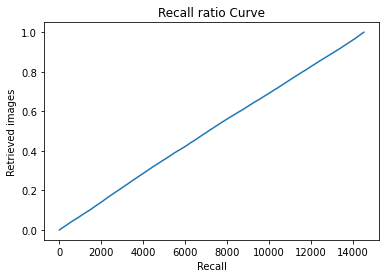

In [6]:
x,y = a.calc_recall_ratio(l_c)

[FLICKR] 33 classes with a total of 14501 samples
[FLICKR] 33 classes with a total of 14501 samples


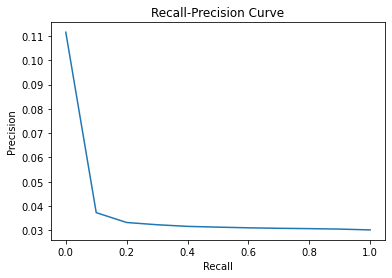

In [7]:
rp = a.calc_recall_prec(l_c)

[FLICKR] 33 classes with a total of 14501 samples
[FLICKR] 33 classes with a total of 14501 samples


array([0.15540188, 0.04156103, 0.03603674, 0.03324334, 0.0319077 ,
       0.03129775, 0.03104536, 0.03082109, 0.03067369, 0.03055323,
       0.03019482])

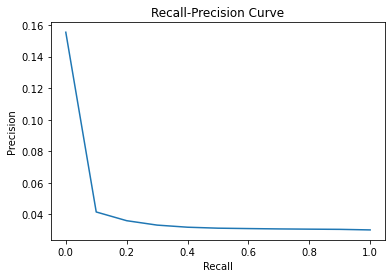

In [5]:
rp = a.calc_recall_prec(l_c)
rp

In [8]:
pw = r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\T2\best_SiameseNetwork_contrastive.pth'
pd = 'B:\Flickr\Flickr15K'
l_c = 'B:\Flickr\Flickr15K\images'
sim = torch.nn.CosineSimilarity()
contrastive = Evaluator(pw,pd,sim)

14501 images loaded successfully


In [10]:
pq = r'B:\Flickr\Flickr15K\queries'
contrastive.calc_all_ranks(pq)

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3428.94it/s]


In [11]:
mapita = contrastive.calc_map()
mapita

0.030487075413661465

[FLICKR] 33 classes with a total of 14501 samples
[FLICKR] 33 classes with a total of 14501 samples


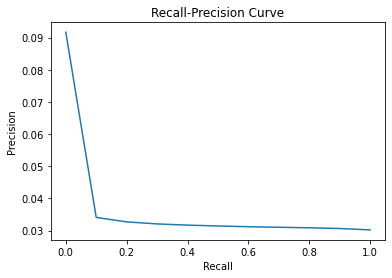

In [12]:
rp = contrastive.calc_recall_prec(l_c)

[FLICKR] 33 classes with a total of 14501 samples
[FLICKR] 33 classes with a total of 14501 samples


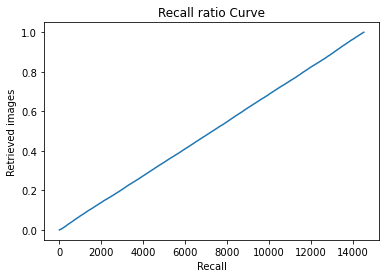

In [14]:
x,y = contrastive.calc_recall_ratio(l_c)